In [12]:
import re
import numpy as np
import pandas as pd

ips = []
times = []
pattern = re.compile(r"\d+\.\d+\.\d+\.\d+")

with open("oct2019.txt") as infile:
    for line in infile:
        parts = line.split()
        if len(parts) > 2 and pattern.fullmatch(parts[2]):
            ips.append(parts[2])
            times.append(parts[6])

# List of unique addresses (1379). This is done because multiple querys for same IP is forbidden
ips_uniq = list(np.unique(np.array(ips))) 

ip_df = pd.DataFrame({"ip": ips, "time": times})
ip_df 

,ip,time
0,193.32.163.182,23:23
1,194.1.188.84,23:15
2,92.63.194.26,22:57
3,140.207.46.136,22:33
4,140.207.46.136,22:33
...,...,...
8370,189.8.68.56,07:22
8371,173.186.205.106,07:17
8372,119.254.11.254,07:12
8373,46.33.225.84,07:11


In [13]:
datetime_obj = pd.to_datetime(ip_df["time"]) 
ip_df["time"] = datetime_obj.dt.hour
ip_df 

,ip,time
0,193.32.163.182,23
1,194.1.188.84,23
2,92.63.194.26,22
3,140.207.46.136,22
4,140.207.46.136,22
...,...,...
8370,189.8.68.56,7
8371,173.186.205.106,7
8372,119.254.11.254,7
8373,46.33.225.84,7


In [15]:
import time
import json
from urllib import request

res = []
for i in range(0, len(ips_uniq), 100):
    print(f"{i}/{len(ips_uniq)}")
    params = [{"query" : ip, "fields" : "country"} for ip in ips_uniq[i:(i + 100)]]
    data = json.dumps(params)
    data = data.encode("ascii")
    with request.urlopen("http://ip-api.com/batch", data) as req:
        res.append(req.read())
    time.sleep(5)

0/1379
100/1379
200/1379
300/1379
400/1379
500/1379
600/1379
700/1379
800/1379
900/1379
1000/1379
1100/1379
1200/1379
1300/1379


In [24]:
json_res = [json.loads(r) for r in res]

with open("locs.json", "w") as outfile:
    json.dump(json_res, outfile)
    
country_list = []
for r in json_res:
    for d in r:
        country_list.append(d)
        
country_list[0:10]

[{'country': 'China'},
 {'country': 'Thailand'},
 {'country': 'China'},
 {'country': 'China'},
 {'country': 'South Korea'},
 {'country': 'United States'},
 {'country': 'Australia'},
 {'country': 'China'},
 {'country': 'Indonesia'},
 {'country': 'Indonesia'}]

In [25]:
country_list = [country_list[i]["country"] for i in range(len(ips_uniq))]

country_df = pd.DataFrame({"ip": ips_uniq, "country": country_list})
country_df

,ip,country
0,1.119.150.195,China
1,1.179.182.82,Thailand
2,1.180.133.42,China
3,1.203.80.78,China
4,1.232.77.64,South Korea
...,...,...
1374,96.67.115.46,United States
1375,96.76.166.105,United States
1376,98.143.227.144,United States
1377,98.207.32.236,United States


In [26]:
combined_df = pd.merge(ip_df, country_df, how = "left", on = "ip") # get countries with left join
combined_df

,ip,time,country
0,193.32.163.182,23,Bulgaria
1,194.1.188.84,23,Czechia
2,92.63.194.26,22,Netherlands
3,140.207.46.136,22,China
4,140.207.46.136,22,China
...,...,...,...
8370,189.8.68.56,7,Brazil
8371,173.186.205.106,7,United States
8372,119.254.11.254,7,China
8373,46.33.225.84,7,Ukraine


In [85]:
attacks = combined_df.groupby("country")["ip"].count()
attacks = attacks.sort_values(ascending = False)
attacks

country
Vietnam           1519
United States      871
Japan              822
United Kingdom     702
China              642
                  ... 
Pakistan             1
Guatemala            1
Cambodia             1
Nepal                1
Zimbabwe             1
Name: ip, Length: 83, dtype: int64

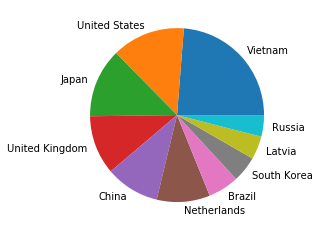

In [86]:
import matplotlib.pyplot as plt

plt.pie(attacks[0:10], labels = attacks.index[0:10])
plt.savefig("hackpie.png")
plt.show()

In [76]:
attacks = combined_df.groupby("time")["ip"].count()
attacks = attacks.sort_index()
attacks

time
0     290
1     348
2     255
3     336
4     276
5     282
6     239
7     117
8     100
9     324
10    151
11    208
12    211
13    211
14    293
15    705
16    474
17    827
18    684
19    254
20    629
21    253
22    429
23    479
Name: ip, dtype: int64

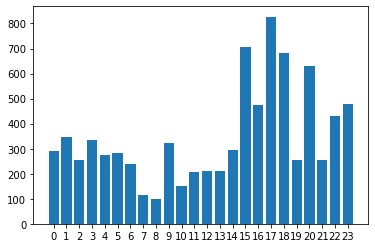

In [84]:
plt.bar(attacks.index, attacks)
plt.xticks(attacks.index)
plt.savefig("hackbar.png")
plt.show()

In [14]:
import re
import numpy as np
import pandas as pd

ips = []
times = []
pattern = re.compile(r"\d+\.\d+\.\d+\.\d+")

with open("oct2019.txt") as infile:
    for line in infile:
        parts = line.split()
        if len(parts) > 2 and pattern.fullmatch(parts[2]):
            ips.append(parts[2])
            times.append(parts[6])

ip_df = pd.DataFrame({"ip": ips, "time": times})
ip_df

,ip,time
0,193.32.163.182,23:23
1,194.1.188.84,23:15
2,92.63.194.26,22:57
3,140.207.46.136,22:33
4,140.207.46.136,22:33
...,...,...
8370,189.8.68.56,07:22
8371,173.186.205.106,07:17
8372,119.254.11.254,07:12
8373,46.33.225.84,07:11


In [19]:
ip_df.groupby("ip").count()

,time
ip,
1.119.150.195,2
1.179.182.82,1
1.180.133.42,1
1.203.80.78,1
1.232.77.64,2
...,...
96.67.115.46,1
96.76.166.105,1
98.143.227.144,1
